In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("../classifier_compression/logs/master___2018.07.24-235532/arch_space.csv")
df

,Unnamed: 0,File,NNZ,MACs,Top1
0,0,BEST_adc_episode_117_checkpoint.pth.tar,12296696,263284916,90.54
1,1,BEST_adc_episode_013_checkpoint.pth.tar,10608175,231102406,89.66
2,2,BEST_adc_episode_001_checkpoint.pth.tar,3805850,83514494,10.00
3,3,BEST_adc_episode_002_checkpoint.pth.tar,1896800,39151400,10.00
4,4,BEST_adc_episode_124_checkpoint.pth.tar,12023704,256894642,90.61
5,5,BEST_adc_episode_025_checkpoint.pth.tar,9965512,238710106,90.10
6,6,BEST_adc_episode_004_checkpoint.pth.tar,6563187,111504654,23.13
7,7,BEST_adc_episode_010_checkpoint.pth.tar,7941730,212751472,89.29
8,8,BEST_adc_episode_136_checkpoint.pth.tar,12840751,273482956,90.68
9,9,BEST_adc_episode_005_checkpoint.pth.tar,8555297,185852876,81.59


In [70]:
df2 = pd.read_csv("../classifier_compression/logs/master___2018.07.24-232342/arch_space.csv")
df2
df3 = pd.read_csv("../classifier_compression/logs/master___2018.07.24-225916/arch_space.csv")
df3

,Unnamed: 0,File,NNZ,MACs,Top1
0,0,BEST_adc_episode_003_checkpoint.pth.tar,4770986,86797580,11.60
1,1,BEST_adc_episode_001_checkpoint.pth.tar,4804162,90519442,10.07
2,2,BEST_adc_episode_142_checkpoint.pth.tar,13038094,279552826,90.77
3,3,BEST_adc_episode_113_checkpoint.pth.tar,9877163,234560606,90.48
4,4,BEST_adc_episode_016_checkpoint.pth.tar,8534957,188821328,84.02
5,5,BEST_adc_episode_002_checkpoint.pth.tar,1643593,83911054,10.00
6,6,BEST_adc_episode_125_checkpoint.pth.tar,12157454,265993040,90.58
7,7,BEST_adc_episode_130_checkpoint.pth.tar,12513507,265619958,90.59
8,8,BEST_adc_episode_107_checkpoint.pth.tar,9963371,233031242,89.59
9,9,BEST_adc_episode_047_checkpoint.pth.tar,10195618,238916830,89.24


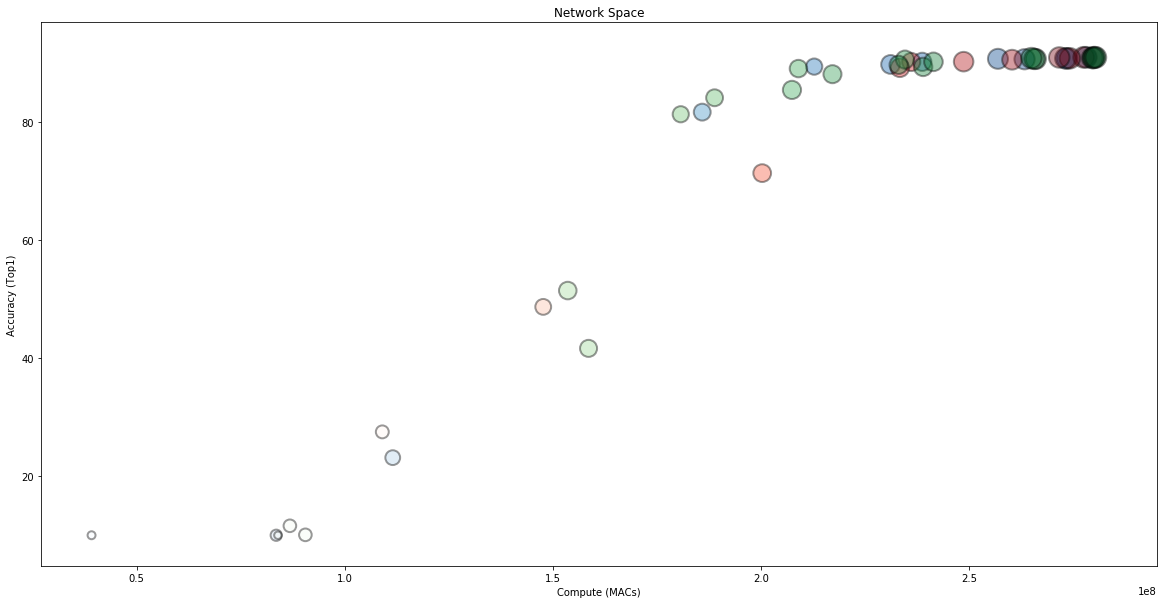

In [71]:
def add_results(df, cmap):
    # create data
    x = df['MACs'].tolist()
    y = df['Top1'].tolist()
    z = df['NNZ'].tolist()
    z = [n/30000 for n in z]
    plt.scatter(x, y, s=z, c=x, cmap=cmap, alpha=0.4, edgecolors="black", linewidth=2)

# Change color with c and alpha. I map the color to the X axis value.
plt.figure(figsize=(20,10))
add_results(df, cmap="Blues")
add_results(df2, cmap="Reds")
add_results(df3, cmap="Greens")

# Add titles (main and on axis)
plt.xlabel("Compute (MACs)")
plt.ylabel("Accuracy (Top1)")
plt.title("Network Space")
plt.show()